**Loading the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
print(df.shape)

(8807, 12)


**EDA**


In this section, we extract some general information from the data set

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df['director'].value_counts()[:10]

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


In [ ]:
df['listed_in'].value_counts()[:20]

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


In [ ]:
df['country'].value_counts()[:25]

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


The number of movies and series that have been made in different years

<Axes: title={'center': 'Movies in 1970 to 2018 '}, xlabel='release_year'>

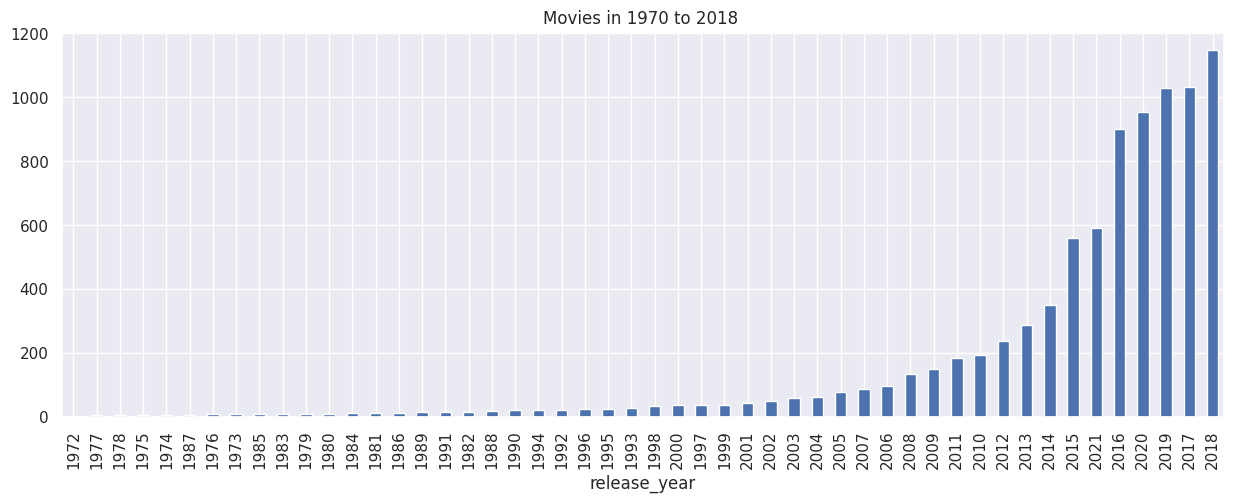

In [ ]:
df['release_year'].value_counts()[:50].sort_values(ascending=True).plot.bar(figsize=(15, 5),title='Movies in 1970 to 2018 ',)

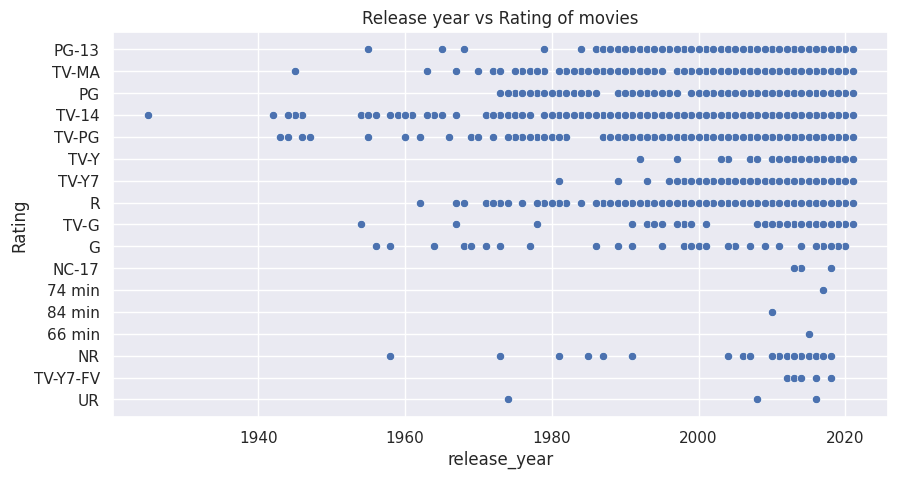

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='release_year', y='rating', data=df)
plt.title('Release year vs Rating of movies')
plt.xlabel('release_year')
plt.ylabel('Rating')
plt.show()

<Axes: ylabel='count'>

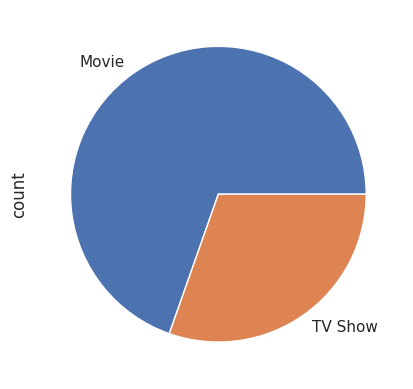

In [ ]:
df['type'].value_counts().plot.pie()

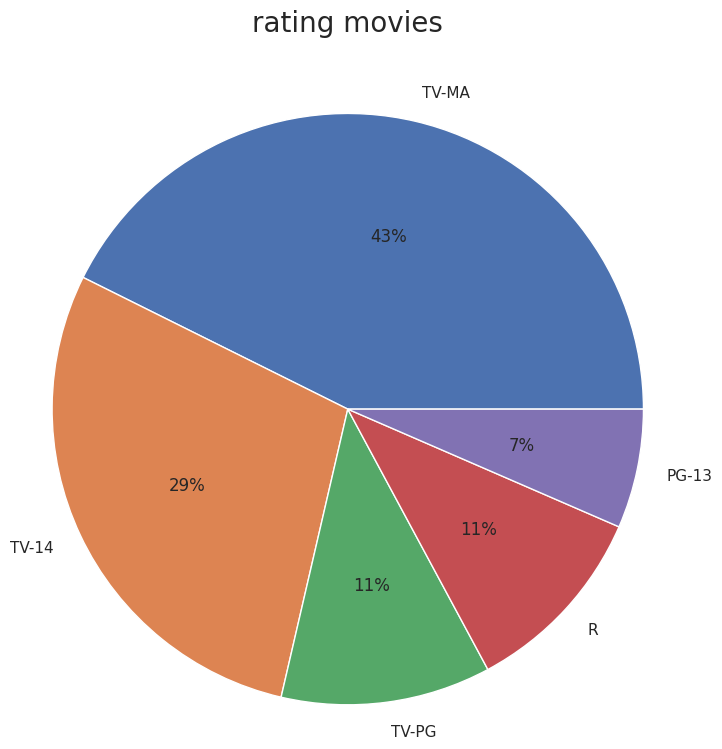

In [ ]:
df['rating'].value_counts()[0:5].plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('rating movies', y=1.5,fontsize=20)
plt.show()

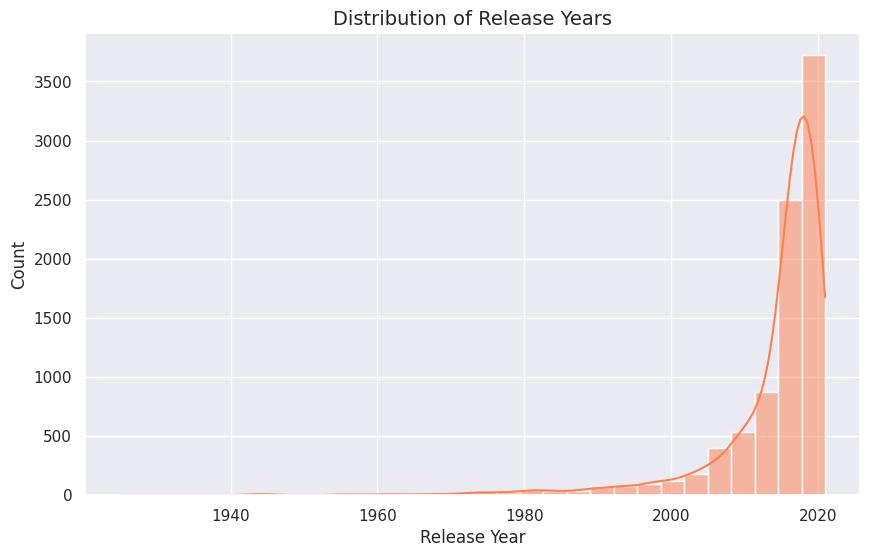

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], kde=True, bins=30, color='coral')
plt.title('Distribution of Release Years', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Handle missing data by filling N/A with "Unknown" for categorical columns, and removing for date columns

In [ ]:
df_cleaned = df.copy()
df_cleaned['director'].fillna('Unknown', inplace=True)
df_cleaned['cast'].fillna('Unknown', inplace=True)
df_cleaned['country'].fillna('Unknown', inplace=True)
df_cleaned.dropna(subset=['rating'], inplace=True)
df_cleaned.dropna(subset=['duration'], inplace=True)
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')  # Convert date_added to datetime
df_cleaned.dropna(subset=['date_added'], inplace=True)

<ipython-input-22-ae459571f215>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['director'].fillna('Unknown', inplace=True)
<ipython-input-22-ae459571f215>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df_cleaned.describe()

,date_added,release_year
count,8702,8702.000000
mean,2019-05-23 17:46:40.735463168,2014.196736
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-24 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.829530


Split the genres in the "listed_in" column

In [ ]:
df_cleaned['genres'] = df_cleaned['listed_in'].str.split(', ').apply(list)

# Explode the genre column so each genre has its own row
df_genre = df_cleaned.explode('genres')

Plot the top 10 genres overall

<ipython-input-25-b32376060393>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


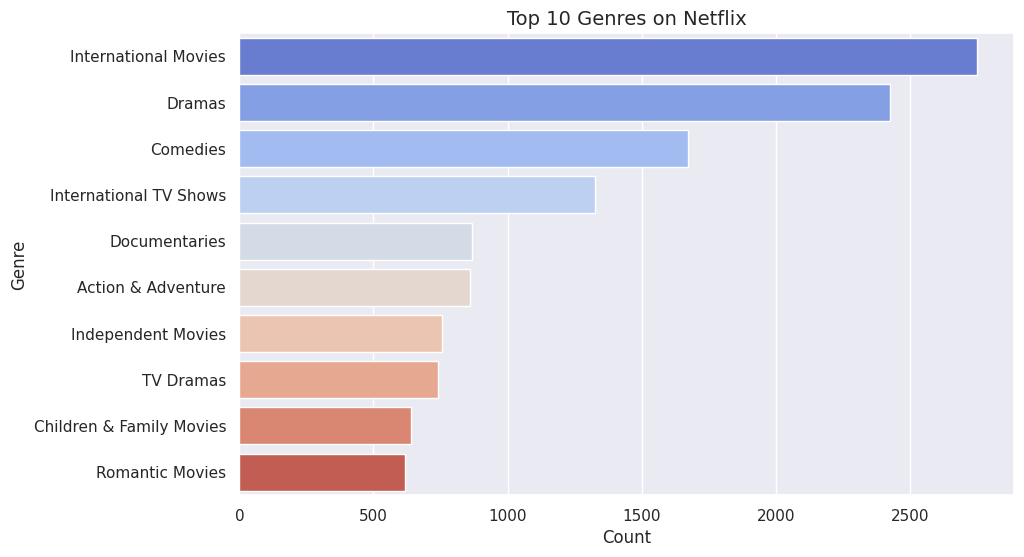

In [ ]:
top_genres = df_genre['genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."


**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df_cleaned.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df[df.duplicated()].shape

(0, 12)

# Data Preprocessing

In this section we are going to convert all values to numerical types.

In [ ]:
df_cleaned.select_dtypes(include = "object").columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description', 'genres'],
      dtype='object')

We need to check each columns value counts to decide whether categorizing data or use one-hot encoding or embedding.

In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."


Defining new DataFrame to save preprocessed data in.

In [ ]:
df_preprocessed = pd.DataFrame()

We can remove 's' from each show id in order to easily convert it to number.

In [ ]:
df_cleaned['show_id'].iloc[:5]

,show_id
0,s1
1,s2
2,s3
3,s4
4,s5


In [ ]:
df_preprocessed['show_id'] = df_cleaned.apply(lambda x: x['show_id'].replace('s', ''), axis=1)

Extracting the number of seasons from the 'duration' column. If type is 'TV Show', then number of seasons would be considered, otherwise number of seasons is 0.

In [ ]:
df_cleaned['duration'] = df_cleaned['duration'].astype(str)
df_preprocessed['seasons'] = df_cleaned['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x else 0)

Rows with 'Movie' type have duration in minute format. Another column is created for this type and duration is written as a number (in minute). For 'TV Shows' duration is considered 0.

In [ ]:
df_preprocessed['duration_time'] = df_cleaned['duration'].apply(lambda x: int(x.replace(' min', '')) if 'min' in x else 0)

Let's take a look at result.

In [ ]:
df_preprocessed.head(10)

,show_id,seasons,duration_time
0,1,0,90
1,2,2,0
2,3,1,0
3,4,1,0
4,5,2,0
5,6,1,0
6,7,0,91
7,8,0,125
8,9,9,0
9,10,0,104


Categorizing is a good idea for columns with a lot of unique values.

In [ ]:
len(df_cleaned['type'].unique())

2

In [ ]:
len(df_cleaned['director'].unique())

4528

In [ ]:
len(df_cleaned['country'].unique())

749

In [ ]:
len(df_cleaned['rating'].unique())

15

In [ ]:
len(df_cleaned['duration'].unique())

220

In [ ]:
len(df_cleaned['listed_in'].unique())

514

In [ ]:
len(df_cleaned['genres'].value_counts())

514

In [ ]:
to_categorical_columns = ['director','country','rating']
for column in to_categorical_columns:
  df_preprocessed[f'{column}_code'] = df_cleaned[column].astype('category').cat.codes
df_preprocessed.head()

,show_id,seasons,duration_time,director_code,country_code,rating_code
0,1,0,90,2295,603,4
1,2,2,0,4302,426,8
2,3,1,0,2105,736,8
3,4,1,0,4302,736,8
4,5,2,0,4302,251,8


One-Hot encoding is usually used for columns with limited ranges. Here we are going to use it for 'type' column. Also let's see whether it is useful for 'genres' column or not.

In [ ]:
encoded_df = pd.get_dummies(df_cleaned['type'], dtype=int)
df_preprocessed[encoded_df.columns] = encoded_df

In [ ]:
df_preprocessed

,show_id,seasons,duration_time,director_code,country_code,rating_code,Movie,TV Show
0,1,0,90,2295,603,4,1,0
1,2,2,0,4302,426,8,0,1
2,3,1,0,2105,736,8,0,1
3,4,1,0,4302,736,8,0,1
4,5,2,0,4302,251,8,0,1
...,...,...,...,...,...,...,...,...
8802,8803,0,158,979,603,5,1,0
8803,8804,2,0,4302,736,11,0,1
8804,8805,0,88,3630,603,5,1,0
8805,8806,0,88,3246,603,3,1,0


In [ ]:
from collections import Counter

count_genres = Counter(i[0] for i in df_cleaned['genres'].to_list())
count_genres.most_common()

[('Dramas', 1600),
 ('Comedies', 1210),
 ('Action & Adventure', 859),
 ('Documentaries', 829),
 ('International TV Shows', 774),
 ('Children & Family Movies', 605),
 ('Crime TV Shows', 399),
 ("Kids' TV", 388),
 ('Stand-Up Comedy', 334),
 ('Horror Movies', 275),
 ('British TV Shows', 253),
 ('Docuseries', 221),
 ('Anime Series', 176),
 ('International Movies', 128),
 ('TV Comedies', 120),
 ('Reality TV', 120),
 ('Classic Movies', 80),
 ('TV Dramas', 67),
 ('Thrillers', 65),
 ('Movies', 54),
 ('TV Action & Adventure', 40),
 ('Stand-Up Comedy & Talk Shows', 34),
 ('Romantic TV Shows', 32),
 ('Classic & Cult TV', 22),
 ('Anime Features', 21),
 ('Independent Movies', 20),
 ('Music & Musicals', 18),
 ('TV Shows', 16),
 ('Sci-Fi & Fantasy', 13),
 ('Cult Movies', 12),
 ('TV Horror', 11),
 ('Romantic Movies', 3),
 ('Spanish-Language TV Shows', 2),
 ('LGBTQ Movies', 1),
 ('TV Sci-Fi & Fantasy', 1),
 ('Sports Movies', 1)]

There are 36 different values for genres. It is better to consider less commons (less than 100) as one value called 'other_genres' in order to reduce number of columns in One-Hot encoding.

In [ ]:
for genres in df_cleaned['genres']:
    for genre in genres:
        if count_genres[genre] < 100:
            genres[genres.index(genre)] = 'other_genres'

In [ ]:
df_cleaned['genres']

,genres
0,[Documentaries]
1,"[International TV Shows, other_genres, other_g..."
2,"[Crime TV Shows, International TV Shows, other..."
3,"[Docuseries, Reality TV]"
4,"[International TV Shows, other_genres, TV Come..."
...,...
8802,"[other_genres, Dramas, other_genres]"
8803,"[Kids' TV, other_genres, TV Comedies]"
8804,"[Comedies, Horror Movies]"
8805,"[Children & Family Movies, Comedies]"


In [ ]:
encoded_df = df_cleaned['genres'].str.join(sep='*').str.get_dummies(sep='*')
df_preprocessed[encoded_df.columns] = encoded_df

'release_year' column is numerical itself.

In [ ]:
df_preprocessed['release_year'] = df_cleaned['release_year']

For 'date_added' column it is better to seperate each element of date to a column.

In [ ]:
df_preprocessed['day_of_week_added'] = df_cleaned['date_added'].dt.dayofweek
df_preprocessed['month_added'] = df_cleaned['date_added'].dt.month
df_preprocessed['year_added'] = df_cleaned['date_added'].dt.year

# cating values to integer
# df_preprocessed['day_of_week_added'] = df_preprocessed['day_of_week_added'].astype(int)
# df_preprocessed['month_added'] = df_preprocessed['month_added'].astype(int)
# df_preprocessed['year_added'] = df_preprocessed['year_added'].astype(int)

In [ ]:
df_preprocessed

,show_id,seasons,duration_time,director_code,country_code,rating_code,Movie,TV Show,Action & Adventure,Anime Series,...,International TV Shows,Kids' TV,Reality TV,Stand-Up Comedy,TV Comedies,other_genres,release_year,day_of_week_added,month_added,year_added
0,1,0,90,2295,603,4,1,0,0,0,...,0,0,0,0,0,0,2020,5.0,9.0,2021.0
1,2,2,0,4302,426,8,0,1,0,0,...,1,0,0,0,0,1,2021,4.0,9.0,2021.0
2,3,1,0,2105,736,8,0,1,0,0,...,1,0,0,0,0,1,2021,4.0,9.0,2021.0
3,4,1,0,4302,736,8,0,1,0,0,...,0,0,1,0,0,0,2021,4.0,9.0,2021.0
4,5,2,0,4302,251,8,0,1,0,0,...,1,0,0,0,1,1,2021,4.0,9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,0,158,979,603,5,1,0,0,0,...,0,0,0,0,0,1,2007,2.0,11.0,2019.0
8803,8804,2,0,4302,736,11,0,1,0,0,...,0,1,0,0,1,1,2018,0.0,7.0,2019.0
8804,8805,0,88,3630,603,5,1,0,0,0,...,0,0,0,0,0,0,2009,4.0,11.0,2019.0
8805,8806,0,88,3246,603,3,1,0,0,0,...,0,0,0,0,0,0,2006,5.0,1.0,2020.0


Other columns ('title', 'cast', 'description') can be embedded using Universal Sentence Encoder.

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
sentence_embeddings = sbert_model.encode(df_cleaned['title'].to_list())
df_preprocessed['title_embed'] = list(sentence_embeddings)

In [ ]:
sentence_embeddings = sbert_model.encode(df_cleaned['cast'].to_list())
df_preprocessed['cast_embed'] = list(sentence_embeddings)

In [ ]:
sentence_embeddings = sbert_model.encode(df_cleaned['description'].to_list())
df_preprocessed['description_embed'] = list(sentence_embeddings)

# Normalization

Now we need to make sure that all columns have a "similar" range. In order to do that we are going to use StandardScaler.

In [ ]:
df_preprocessed.columns

Index(['show_id', 'seasons', 'duration_time', 'director_code', 'country_code',
       'rating_code', 'Movie', 'TV Show', 'Action & Adventure', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Comedies',
       'Crime TV Shows', 'Documentaries', 'Docuseries', 'Dramas',
       'Horror Movies', 'International Movies', 'International TV Shows',
       'Kids' TV', 'Reality TV', 'Stand-Up Comedy', 'TV Comedies',
       'other_genres', 'release_year', 'day_of_week_added', 'month_added',
       'year_added', 'title_embed', 'cast_embed', 'description_embed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
standard_scaling_columns = ['seasons', 'duration_time', 'director_code', 'country_code',
                          'rating_code', 'Movie', 'TV Show', 'Action & Adventure', 'Anime Series',
                          'British TV Shows', 'Children & Family Movies', 'Comedies',
                          'Crime TV Shows', 'Documentaries', 'Docuseries', 'Dramas',
                          'Horror Movies', 'International Movies', 'International TV Shows',
                          "Kids' TV", 'Reality TV', 'Stand-Up Comedy', 'TV Comedies',
                          'other_genres', 'release_year', 'day_of_week_added', 'month_added',
                          'year_added']
df_preprocessed[standard_scaling_columns] = scaler.fit_transform(df_preprocessed[standard_scaling_columns])
df_preprocessed.describe()

,seasons,duration_time,director_code,country_code,rating_code,Movie,TV Show,Action & Adventure,Anime Series,British TV Shows,...,International TV Shows,Kids' TV,Reality TV,Stand-Up Comedy,TV Comedies,other_genres,release_year,day_of_week_added,month_added,year_added
count,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,...,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.804000e+03,8.706000e+03,8.706000e+03,8.706000e+03
mean,-1.452723e-17,-1.162178e-16,5.165236e-17,7.586440e-17,-1.097613e-16,-4.196754e-17,-8.393508e-17,1.129895e-17,-1.614136e-18,-2.259791e-17,...,9.039162e-17,8.554922e-17,-9.684817e-18,-6.456545e-18,-5.003822e-17,6.416191e-17,1.872398e-15,2.938151e-17,-1.028353e-16,-6.341182e-14
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-4.501587e-01,-1.345188e+00,-2.044903e+00,-2.223751e+00,-3.589072e+00,-1.513270e+00,-6.608208e-01,-3.288135e-01,-1.428240e-01,-1.720093e-01,...,-4.257573e-01,-2.323630e-01,-1.727080e-01,-2.013429e-01,-2.658110e-01,-1.024144e+00,-1.011097e+01,-1.746666e+00,-1.647409e+00,-6.947059e+00
25%,-4.501587e-01,-1.345188e+00,-8.568262e-01,-9.997609e-01,-5.219317e-01,-1.513270e+00,-6.608208e-01,-3.288135e-01,-1.428240e-01,-1.720093e-01,...,-4.257573e-01,-2.323630e-01,-1.727080e-01,-2.013429e-01,-2.658110e-01,-1.024144e+00,-1.338140e-01,-5.880333e-01,-7.731778e-01,-5.670620e-01
50%,-4.501587e-01,3.627301e-01,2.848732e-01,2.437346e-01,5.004483e-01,6.608208e-01,-6.608208e-01,-3.288135e-01,-1.428240e-01,-1.720093e-01,...,-4.257573e-01,-2.323630e-01,-1.727080e-01,-2.013429e-01,-2.658110e-01,9.764250e-01,3.196932e-01,-8.717026e-03,1.010530e-01,7.093771e-02
75%,3.889684e-01,7.120769e-01,9.780792e-01,7.167505e-01,5.004483e-01,6.608208e-01,1.513270e+00,-3.288135e-01,-1.428240e-01,-1.720093e-01,...,-4.257573e-01,-2.323630e-01,-1.727080e-01,-2.013429e-01,-2.658110e-01,9.764250e-01,5.464469e-01,5.705993e-01,9.752838e-01,7.089374e-01
max,1.381500e+01,4.710157e+00,1.136185e+00,1.423836e+00,3.567588e+00,6.608208e-01,1.513270e+00,3.041238e+00,7.001623e+00,5.813641e+00,...,2.348756e+00,4.303611e+00,5.790120e+00,4.966653e+00,3.762072e+00,9.764250e-01,7.732005e-01,1.729232e+00,1.558104e+00,1.346937e+00


In [ ]:
df_preprocessed.head()

,show_id,seasons,duration_time,director_code,country_code,rating_code,Movie,TV Show,Action & Adventure,Anime Series,...,Stand-Up Comedy,TV Comedies,other_genres,release_year,day_of_week_added,month_added,year_added,title_embed,cast_embed,description_embed
0,1,-0.450159,0.401546,-0.432224,0.716751,-1.544312,0.660821,-0.660821,-0.328813,-0.142824,...,-0.201343,-0.265811,-1.024144,0.659824,1.149916,0.683874,1.346937,"[-0.089591235, 0.80661184, 1.3304015, 0.604029...","[0.48930916, 0.004983964, 2.011944, 0.15228914...","[-0.42812416, 0.7126991, 1.9019514, 0.25664237..."
1,2,1.228096,-1.345188,0.978079,-0.146382,0.500448,-1.513270,1.513270,-0.328813,-0.142824,...,-0.201343,-0.265811,0.976425,0.773200,0.570599,0.683874,1.346937,"[0.9051067, -0.06115059, 0.90666944, 0.5099122...","[-0.17056033, 0.42480102, 0.7373324, 0.0686789...","[-0.7825585, 0.09691919, 0.53117, 0.6314168, 0..."
2,3,0.388968,-1.345188,-0.565736,1.365319,0.500448,-1.513270,1.513270,-0.328813,-0.142824,...,-0.201343,-0.265811,0.976425,0.773200,0.570599,0.683874,1.346937,"[0.01683249, -0.05541148, 1.73108, 0.1301521, ...","[0.0074083805, 0.40704185, 0.7704743, -0.33992...","[-0.2858047, 0.37113762, 0.47506452, -0.088042..."
3,4,0.388968,-1.345188,0.978079,1.365319,0.500448,-1.513270,1.513270,-0.328813,-0.142824,...,-0.201343,-0.265811,-1.024144,0.773200,0.570599,0.683874,1.346937,"[0.11221793, 0.384063, 0.8466796, 0.47282314, ...","[0.48930904, 0.004983969, 2.011944, 0.15228893...","[-0.3265802, 0.27516156, 0.60123026, -0.006803..."
4,5,1.228096,-1.345188,0.978079,-0.999761,0.500448,-1.513270,1.513270,-0.328813,-0.142824,...,-0.201343,3.762072,0.976425,0.773200,0.570599,0.683874,1.346937,"[0.8292558, 0.7226541, 0.7192373, -0.46315384,...","[0.216297, 0.34182215, 1.6918238, -0.24039577,...","[0.14930326, 0.569304, 1.1897706, 0.5218238, 0..."


In [ ]:
min(list(df_preprocessed.title_embed.loc[2]))

-2.5281446

In [ ]:
df_preprocessed.Movie.value_counts()

,count
Movie,
0.660821,6128
-1.513270,2676
